In [4]:
using Pkg
Pkg.activate("..")
using Revise
using IMAS

  Activating environment at `~/Coding/julia/IMAS/Project.toml`
┌ Info: Precompiling IMAS [13ead8c1-b7d1-41bb-a6d0-5b8b65ed587a]
└ @ Base loading.jl:1317


In [5]:
core_profiles = IMAS.core_profiles();
resize!(core_profiles.profiles_1d,1)
profiles_1d = core_profiles.profiles_1d[1]

profiles_1d.grid.rho_tor_norm = range(0.0, 1.0, length=21)
profiles_1d.electrons.density = (1.0 .- profiles_1d.grid.rho_tor_norm.^2);
profiles_1d.electrons.temperature = (x;_...) -> (1.0 .- x.^2);

println(profiles_1d.electrons.pressure)
profiles_1d.grid.rho_tor_norm = range(0.0, 1.0, length=5)
println(profiles_1d.electrons.temperature)


[1.60218e-19, 1.594179113625e-19, 1.570296618e-19, 1.5308930036250002e-19, 1.476569088e-19, 1.408166015625e-19, 1.326765258e-19, 1.2336886136250001e-19, 1.1304982079999998e-19, 1.018996493625e-19, 9.0122625e-20, 7.79470583625e-20, 6.56252928e-20, 5.343370436249998e-20, 4.16727018e-20, 3.06667265625e-20, 2.0764252799999985e-20, 1.2337787362500006e-20, 5.783869799999997e-21, 1.5230723625000009e-21, 0.0]
[1.0, 0.9375, 0.75, 0.4375, 0.0]


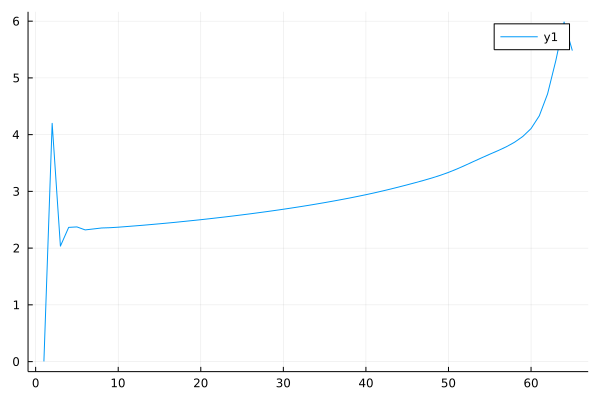

In [135]:
dd=IMAS.json2imas("../sample/sample_equilibrium_ods.json")
eqt=dd.equilibrium.time_slice[1];
tmp=eqt.profiles_1d.gm2
IMAS.flux_surfaces(dd.equilibrium,1)
plot(eqt.profiles_1d.gm2)#./tmp/(2*pi),label="")